CNN - Convolution Neural Network

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [45]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 13 * 13, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 8 * 13 * 13)
        return self.fc1(x)

In [46]:
tranform=transforms.ToTensor()
trainset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=tranform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [47]:
testset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=tranform)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False)

In [48]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=SimpleCNN().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [49]:
model=SimpleCNN().to(device)
for epoch in range(2):
  running_loss=0.0
  for images, labels in trainloader:
    images,labels=images.to(device),labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  print(f"Epoch: {epoch +1}, loss:{running_loss/len(trainloader):.4f}")

Epoch: 1, loss:2.2995
Epoch: 2, loss:2.2995


In [50]:
correct,total=0,0
with torch.no_grad():
  for images,labels in testloader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print(f"Accuracy of the model on the test images: {100*correct/total:.2f}%")

Accuracy of the model on the test images: 9.65%


In [51]:
import matplotlib.pyplot as plt
import numpy as np

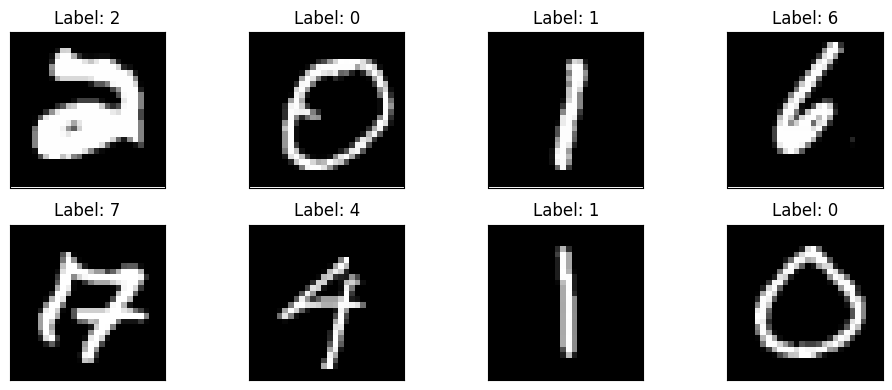

In [52]:
# Get a batch of training data
images, labels = next(iter(trainloader))

# Display the first few images
fig = plt.figure(figsize=(10, 4))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i].numpy()), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
plt.tight_layout()
plt.show()